# Curso de manejo de datos faltantes

<a id = "table-of-content"></a>

## Tabla de contenido

1. [Operar con valores faltantes](#missing)
2. [Cargar los datos](#load-data)
3. [Tabulacion de valores faltantes](#datatab)
4. [Visualizacion de datos faltantes](#visualization)
5. [Codificacion de valores faltantes](#codification)

## Importar librerias

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

In [2]:
%matplotlib inline

sns.set_theme(
    rc = {
        "figure.figsize":(10, 10)
    }
)

sns.set_style("whitegrid")

## Importar funciones personalizadas

In [3]:
%run pandas-missing-extension.ipynb

<a id = "missing"></a>

## 1. Operar con valores faltantes

[Tabla de contenido](#table-of-content)

### Python

In [ ]:
print(
    None or True,
    None or False,
    None == None,
    None is None
)

In [ ]:
print(
    np.nan or True,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan/2,
    type(np.nan),
    sep="\n"
)

In [ ]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x = [0, 1, np.nan, np.nan, None],
        y = [0, 1, pd.NA, np.nan, None]
    )
)
test_missing_df

In [ ]:
test_missing_df.isna()

<a id = "load-data"></a>

## 2. Cargar los datos

### Pima indians diabetes

In [ ]:
pima_indians_diabetes_url = 'https://nrvis.com/data/mldata/pima-indians-diabetes.csv'

In [ ]:
!wget -o ./data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [45]:
diabetes_df = pd.read_csv(
    filepath_or_buffer="./data/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### naniar

In [5]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [6]:
datasets_dfs = {}

for dataset_name in datasets_names:
    dataset_file = f"{dataset_name}{extension}"
    dataset_output_file = f"./data/{dataset_file}"
    dataset_url = f"{base_url}{dataset_file}"

    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{dataset_name}_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

In [7]:
oceanbuoys_df = datasets_dfs["oceanbuoys_df"]
pedestrian_df = datasets_dfs["pedestrian_df"]
riskfactors_df = datasets_dfs["riskfactors_df"]

In [8]:
riskfactors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

<a id = "datatab"></a>

## 3. Tabulacion de valores faltantes

In [9]:
riskfactors_df.missing.number_complete() ## Todo esto viene de la extension de la API de pandas

np.int64(7144)

In [10]:
riskfactors_df.missing.number_missing()

np.int64(1186)

In [11]:
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [12]:
riskfactors_df.missing.missing_variable_table()

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [14]:
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable = "weight_lbs",
        span_every= 50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


In [15]:
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable = "weight_lbs"
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


<a id = "visualization"></a>

## 4. Visualizacion de datos faltantes

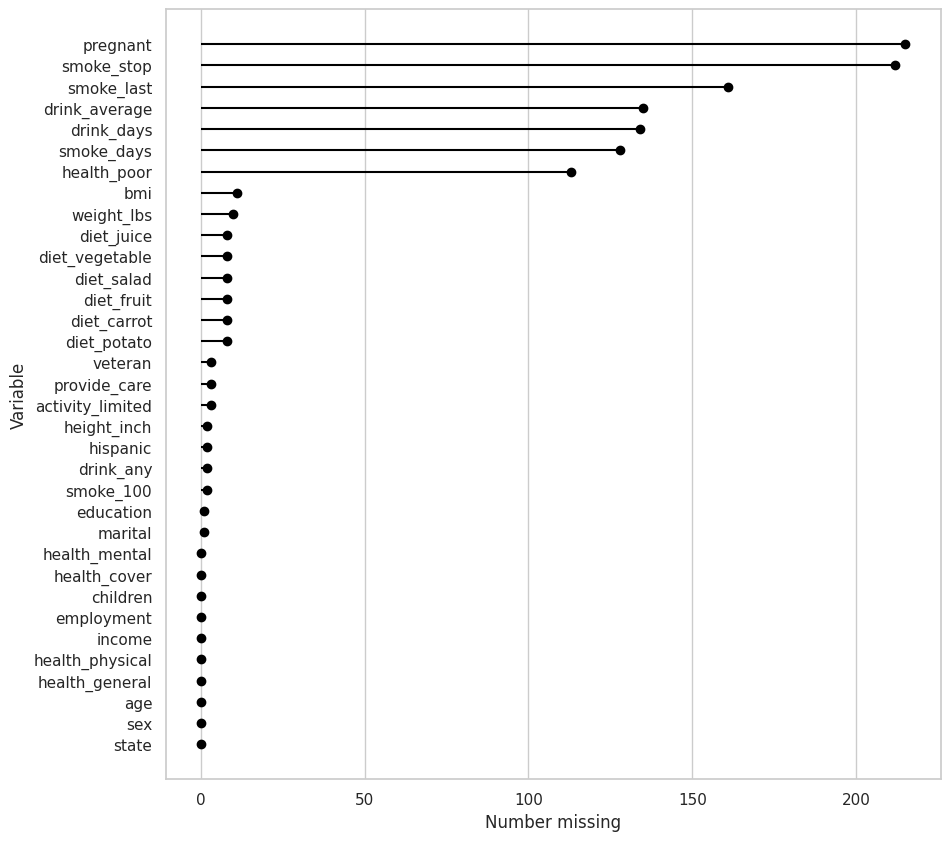

In [17]:
riskfactors_df.missing.missing_variable_plot()

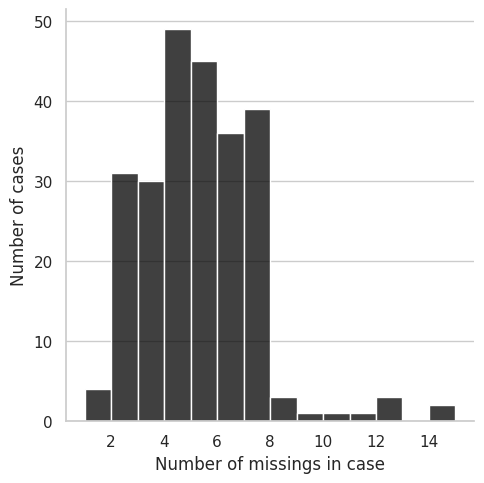

In [18]:
riskfactors_df.missing.missing_case_plot()

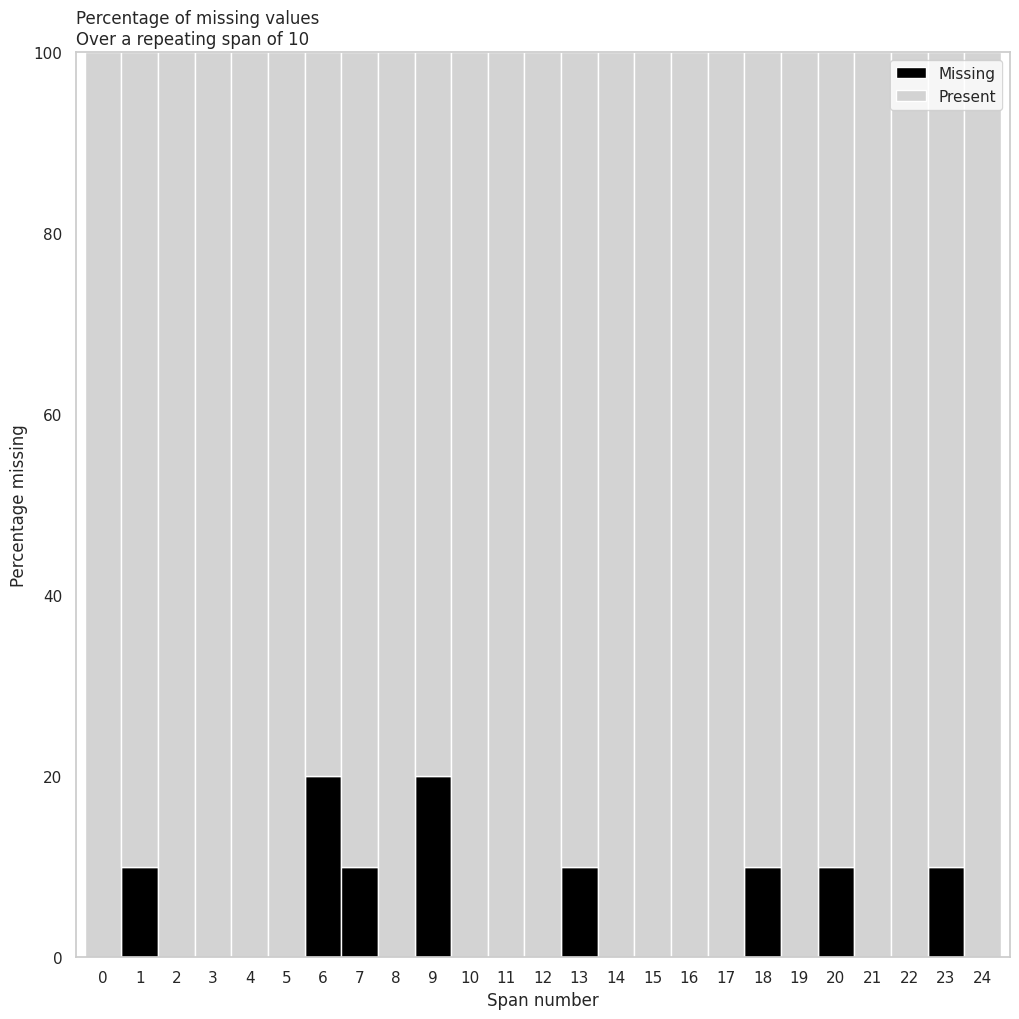

In [19]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable = "weight_lbs",
        span_every = 10,
        rot = 0
    )
)

<Axes: >

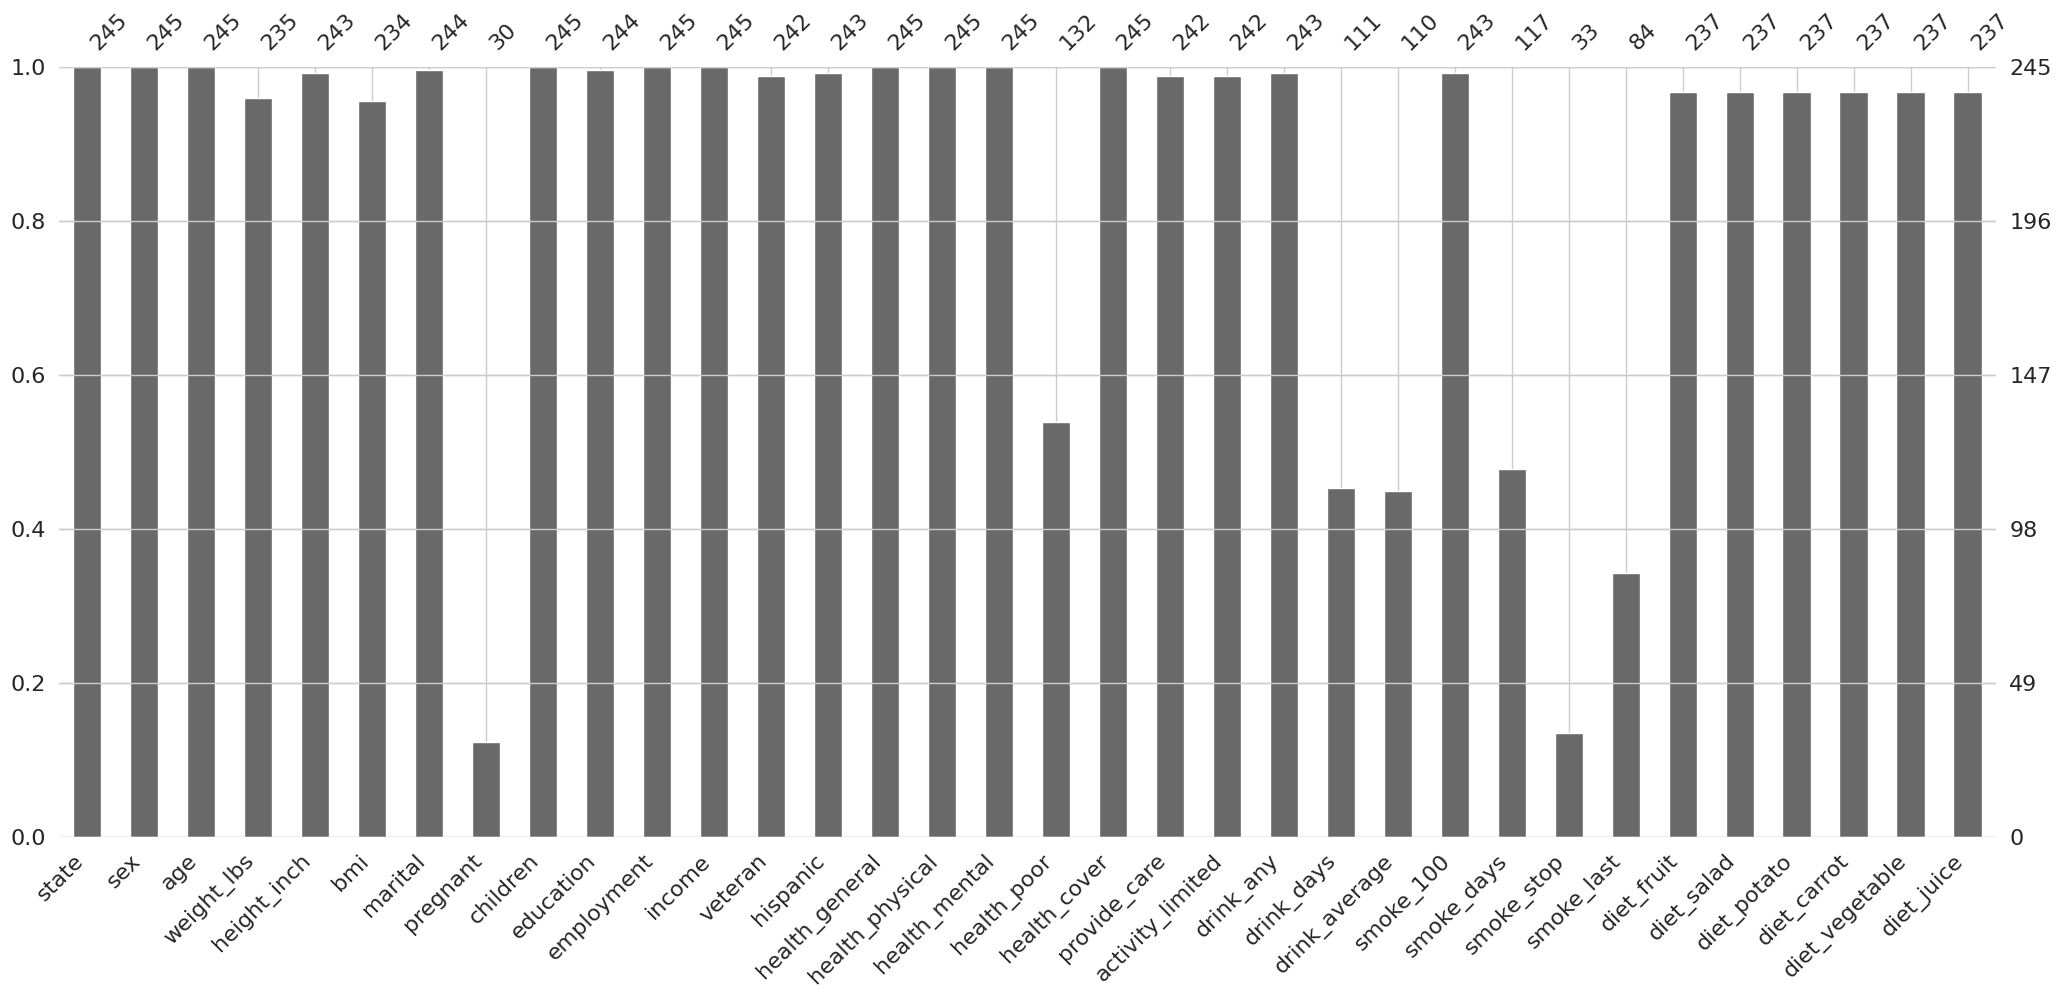

In [20]:
missingno.bar(df = riskfactors_df)

<Axes: >

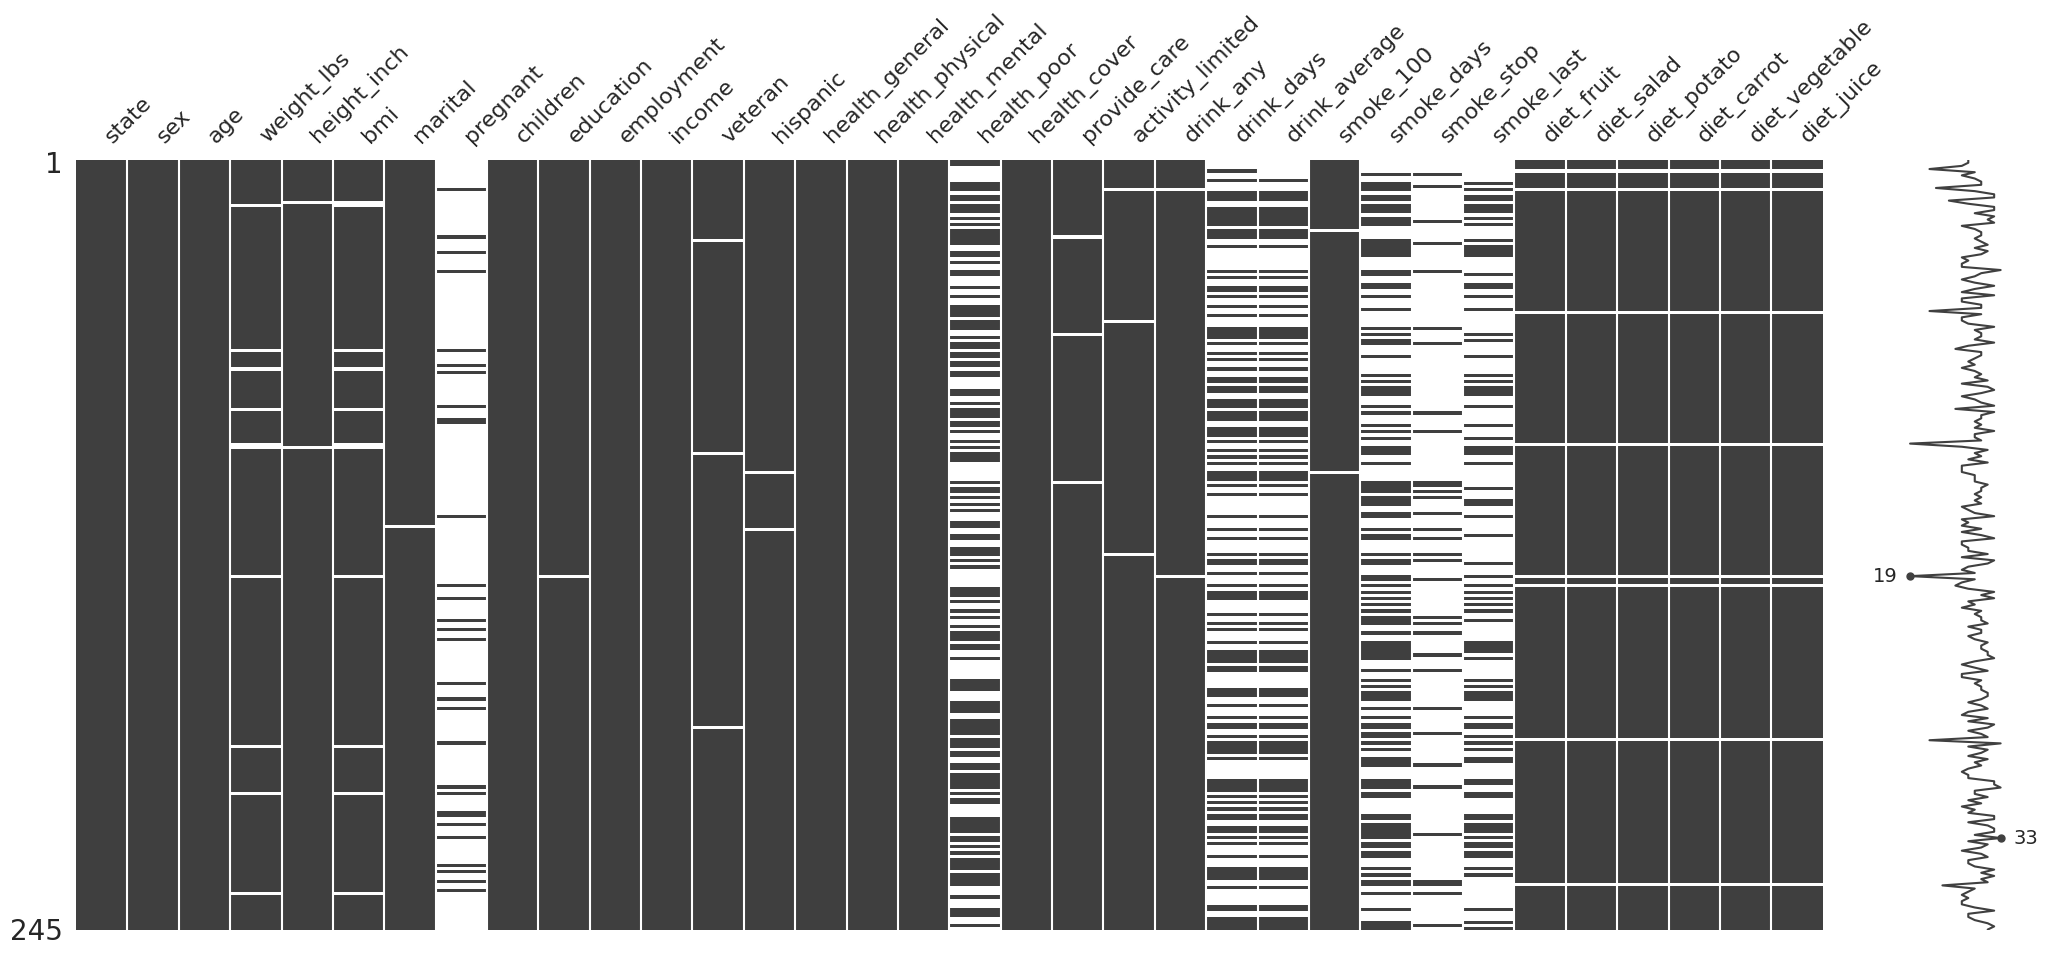

In [21]:
missingno.matrix(df = riskfactors_df)

/home/fernando/Desktop/Platzi/DatosPythonPlatzi/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/fernando/Desktop/Platzi/DatosPythonPlatzi/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

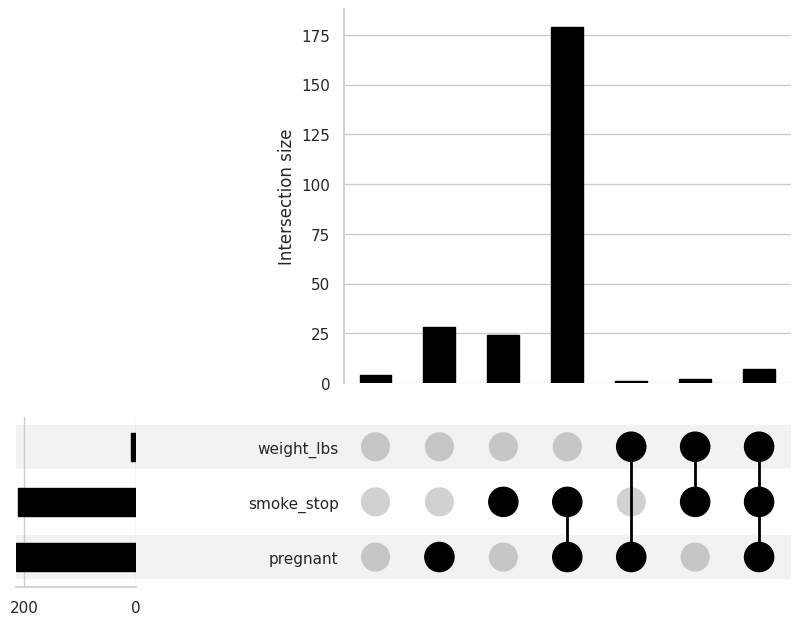

In [23]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = ["pregnant", "weight_lbs", "smoke_stop"],
        element_size = 60
    )
)

<a id = "codification"></a>

## 5. Codificacion de valores faltantes

### Sustitucion desde la lectura de datos

In [25]:
pd.read_csv(
    "./data/missing_data_enconding_example.csv",
    na_filter=True,
    na_values=[-99, -1]
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,NaN
5,NaN,G,NaN


### Sustitucion global

In [26]:
missing_data_example_df = pd.read_csv("./data/missing_data_enconding_example.csv")

In [27]:
(
    missing_data_example_df.replace(
        to_replace=[-99, "NA"],
        value=np.nan
    )
)

,x,y,z
0,1.0,A,-100.0
1,3.0,NaN,NaN
2,NaN,NaN,-98.0
3,NaN,E,-101.0
4,-98.0,F,-1.0
5,NaN,G,-1.0


### Sustitucion dirigida

In [28]:
(
    missing_data_example_df.replace(
        to_replace={
            "x":{
                -99:np.nan
            }
        }
    )
)

,x,y,z
0,1.0,A,-100
1,3.0,NaN,-99
2,NaN,NaN,-98
3,NaN,E,-101
4,-98.0,F,-1
5,NaN,G,-1


## 6. Valores faltantes implicitos

"Implícito se refiere a todo aquello que se entiende que está incluido pero sin ser expresado de forma directa o explícitamente."

Un valor faltante implícito indica que el valor faltante debería estar incluido en el conjunto de datos del análisis, sin que éste lo diga o lo especifique. Por lo general, son valores que podemos encontrar al pivotar nuestros datos o contabilizar el número de apariciones de combinaciones de las variables de estudio.

In [29]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

,name,time,value
0,lynn,morning,350.0
1,lynn,afternoon,310.0
2,lynn,night,NaN
3,zelda,morning,320.0


In [30]:
pd.pivot(data = implicit_to_explicit_df,
    index="name",        # variable nombre como filas
    columns="time",   # variable time como columnas
    values="value"  # variable value como valores de la tabla
)

time,afternoon,morning,night
name,,,
lynn,310.0,350.0,NaN
zelda,NaN,320.0,NaN


In [31]:
(
    implicit_to_explicit_df
    .value_counts(
        subset=["name"]
    )
    .reset_index(name="n")
    .query("n < 3")
)

,name,n
1,zelda,1


In [33]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time"
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


In [34]:
(
    implicit_to_explicit_df
    .complete(
        {"name":["lynn", "zelda"]},
        {"time":["morning", "afternoon"]},
        sort = True
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0


In [35]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value = np.nan
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,NaN
4,zelda,morning,320.0
5,zelda,night,NaN


In [36]:
(
    implicit_to_explicit_df
    .complete(
        "name",
        "time",
        fill_value = 0,
        explicit = False
    )
)

,name,time,value
0,lynn,afternoon,310.0
1,lynn,morning,350.0
2,lynn,night,NaN
3,zelda,afternoon,0.0
4,zelda,morning,320.0
5,zelda,night,0.0


## 7. Tipos de valores faltantes

Tipos de Valores Faltantes

Tenemos tres tipos de mecanismo de valores faltantes:

    Missing Completely at Random (Perdidos completamente al azar)
    Missing at Random (Perdidos al azar)
    Missing not at Random (Perdidos no al azar)

    Missing Completely at Random (MCAR)

Son datos ocasionados por herramientas que dejan de funcionar sin ninguna razon detras. La localizacion de los valores faltantes ocurre completamente al azar, esto no depende de ningun otro dato

    Missing at Random (MAR)

Las herramientas necesitan mantenimiento periodico para asegurar su funcionamiento constante. En las fechas donde se le hace mantenimiento sabemos que ocurrira una falta de datos por lo que esos datos faltantes son localizados. La localizacion de los valores faltantes en el conjunto de datos depende de otros valores observados

    Missing not at Random (MNAR)

Las herramientas tienen limites. Al tratar de hacer seguimientos fuera de su rango de medicion, se generan valores faltantes. La localizacion de los valores faltantes en el conjunto de datos dependen de los valores faltantes en si mismos

Puedo tener seguridad sobre que mecanismo de valores faltantes es correcto para mis datos?

No, no podemos tener seuridad sobre cual mecanismo incidio sobre los datos, pero a traves de analisis y conocimiento del tema puedes hacer suposiciones razonables

### Tipos de valores faltantes

In [46]:
diabetes_df.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


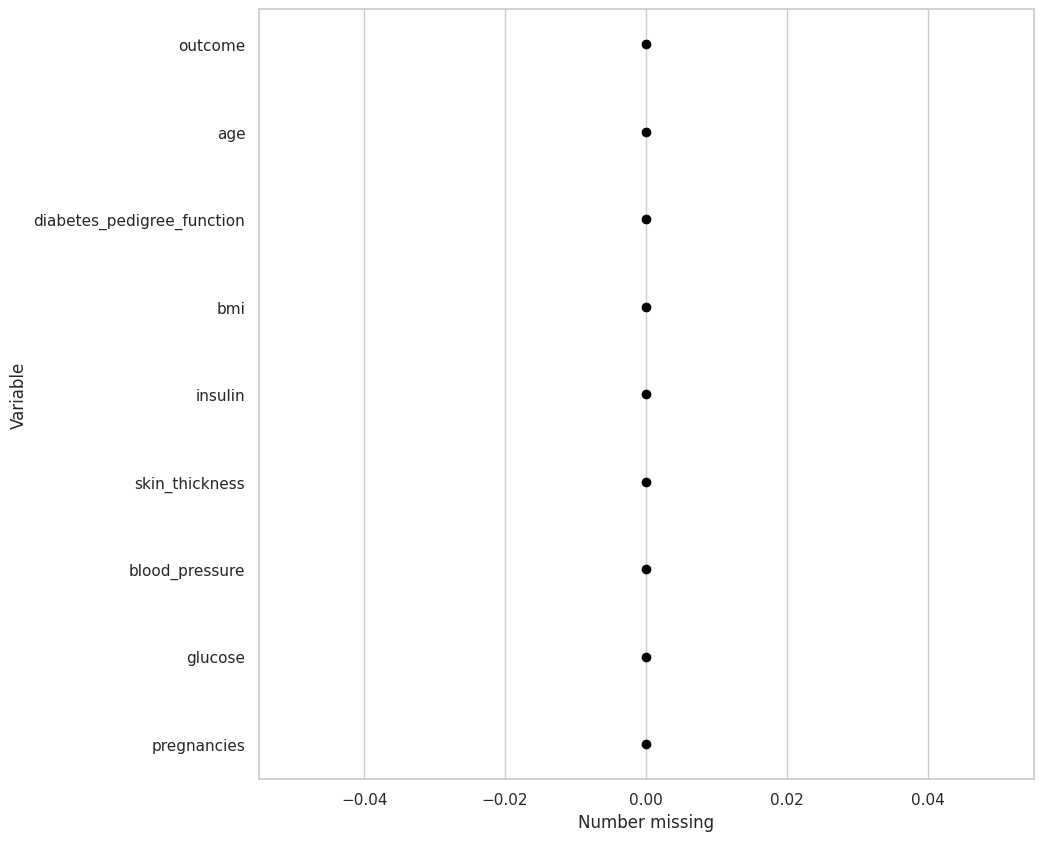

In [47]:
diabetes_df.missing.missing_variable_plot()

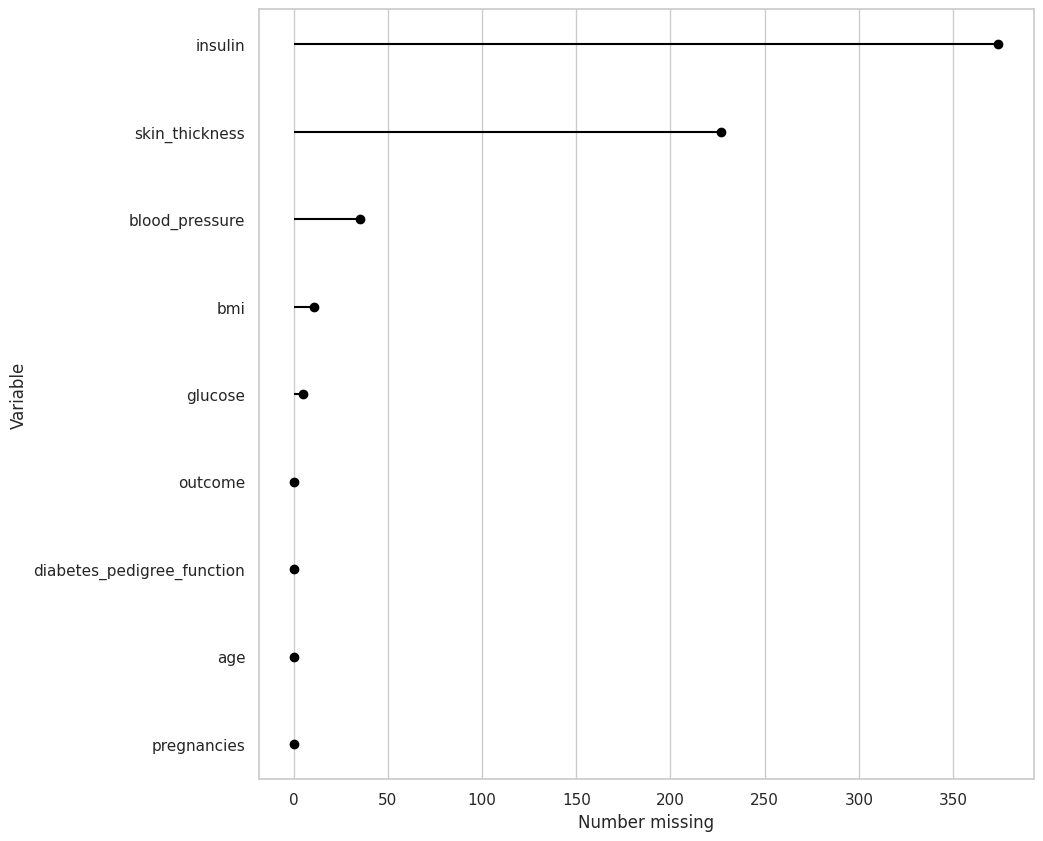

In [48]:
diabetes_df[diabetes_df.columns[1:6]] = diabetes_df[diabetes_df.columns[1:6]].replace(0, np.nan)
diabetes_df.missing.missing_variable_plot()

### MCAR

<Axes: >

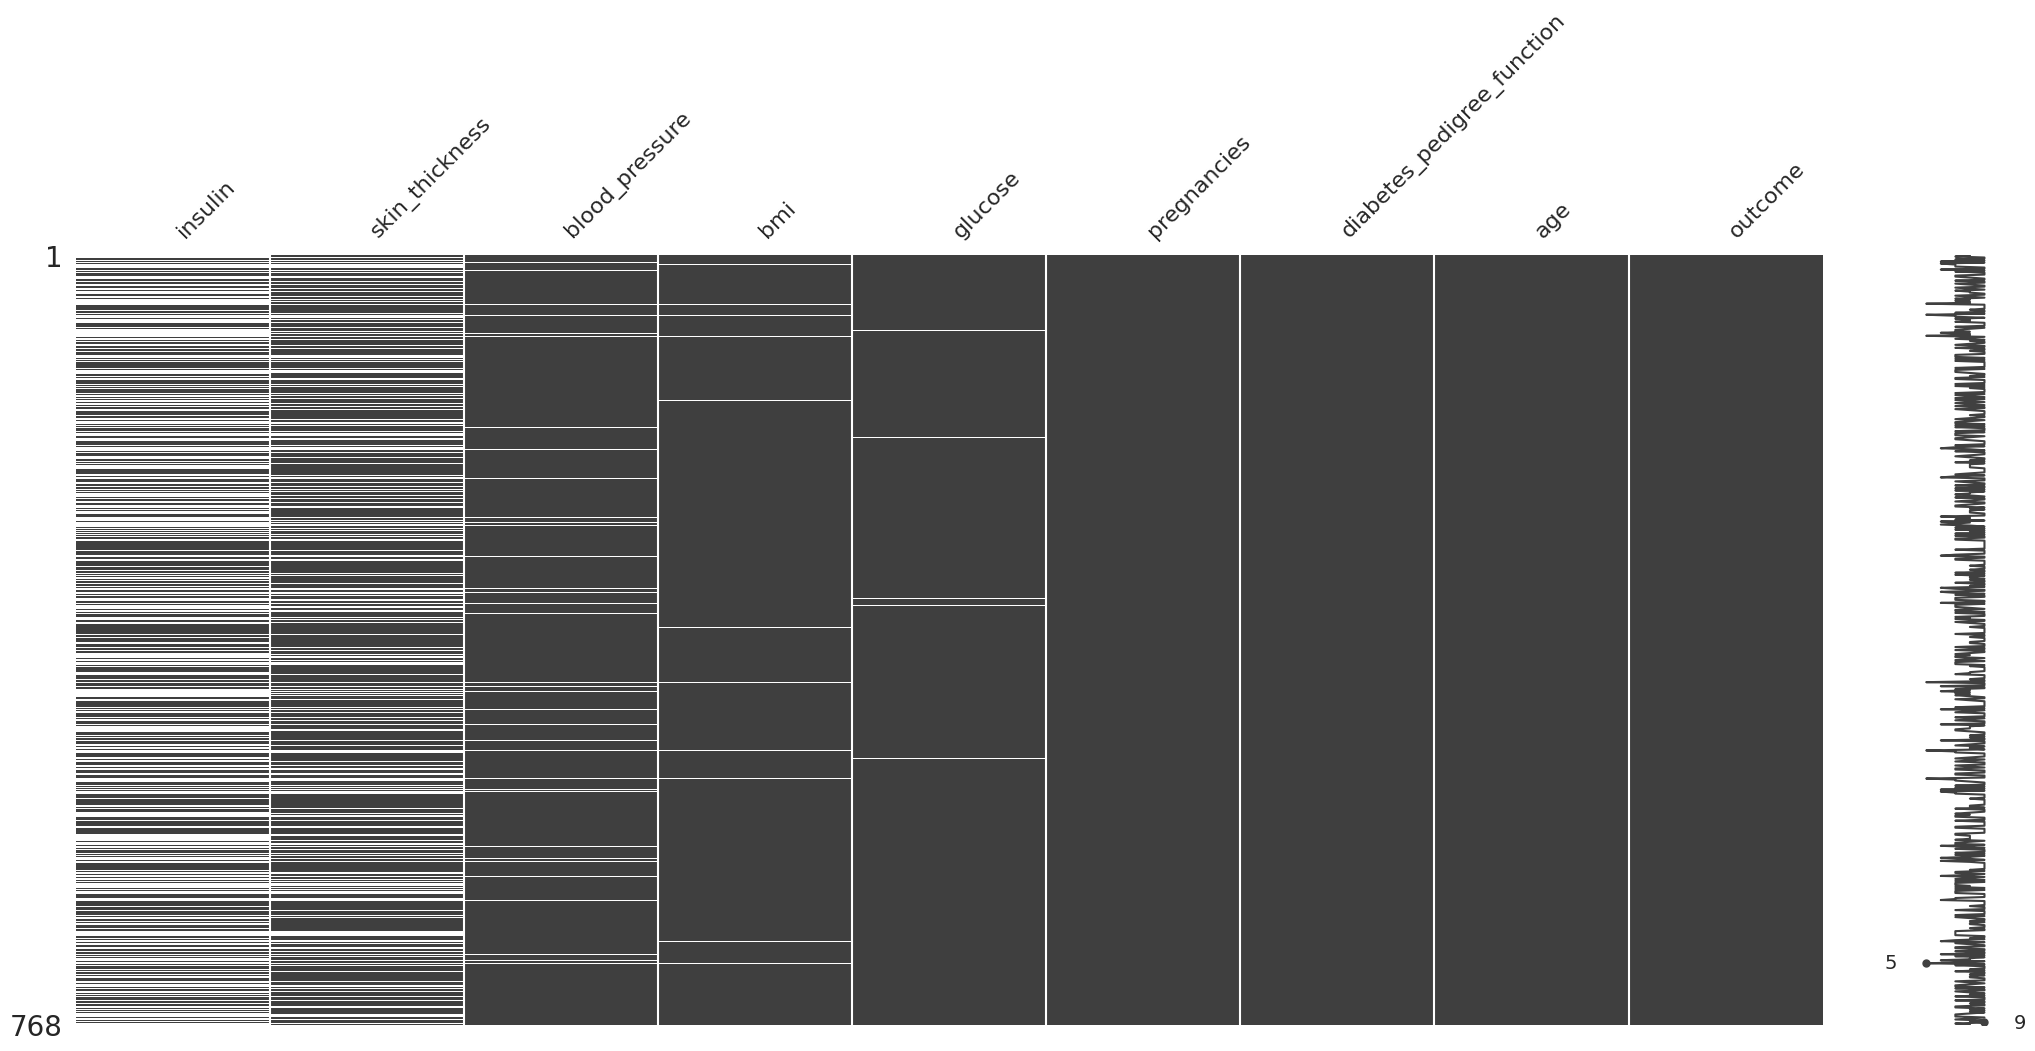

In [49]:
(
    diabetes_df
    .missing
    .sort_variables_by_missingness()
    .pipe(missingno.matrix)
)

### MAR

<Axes: >

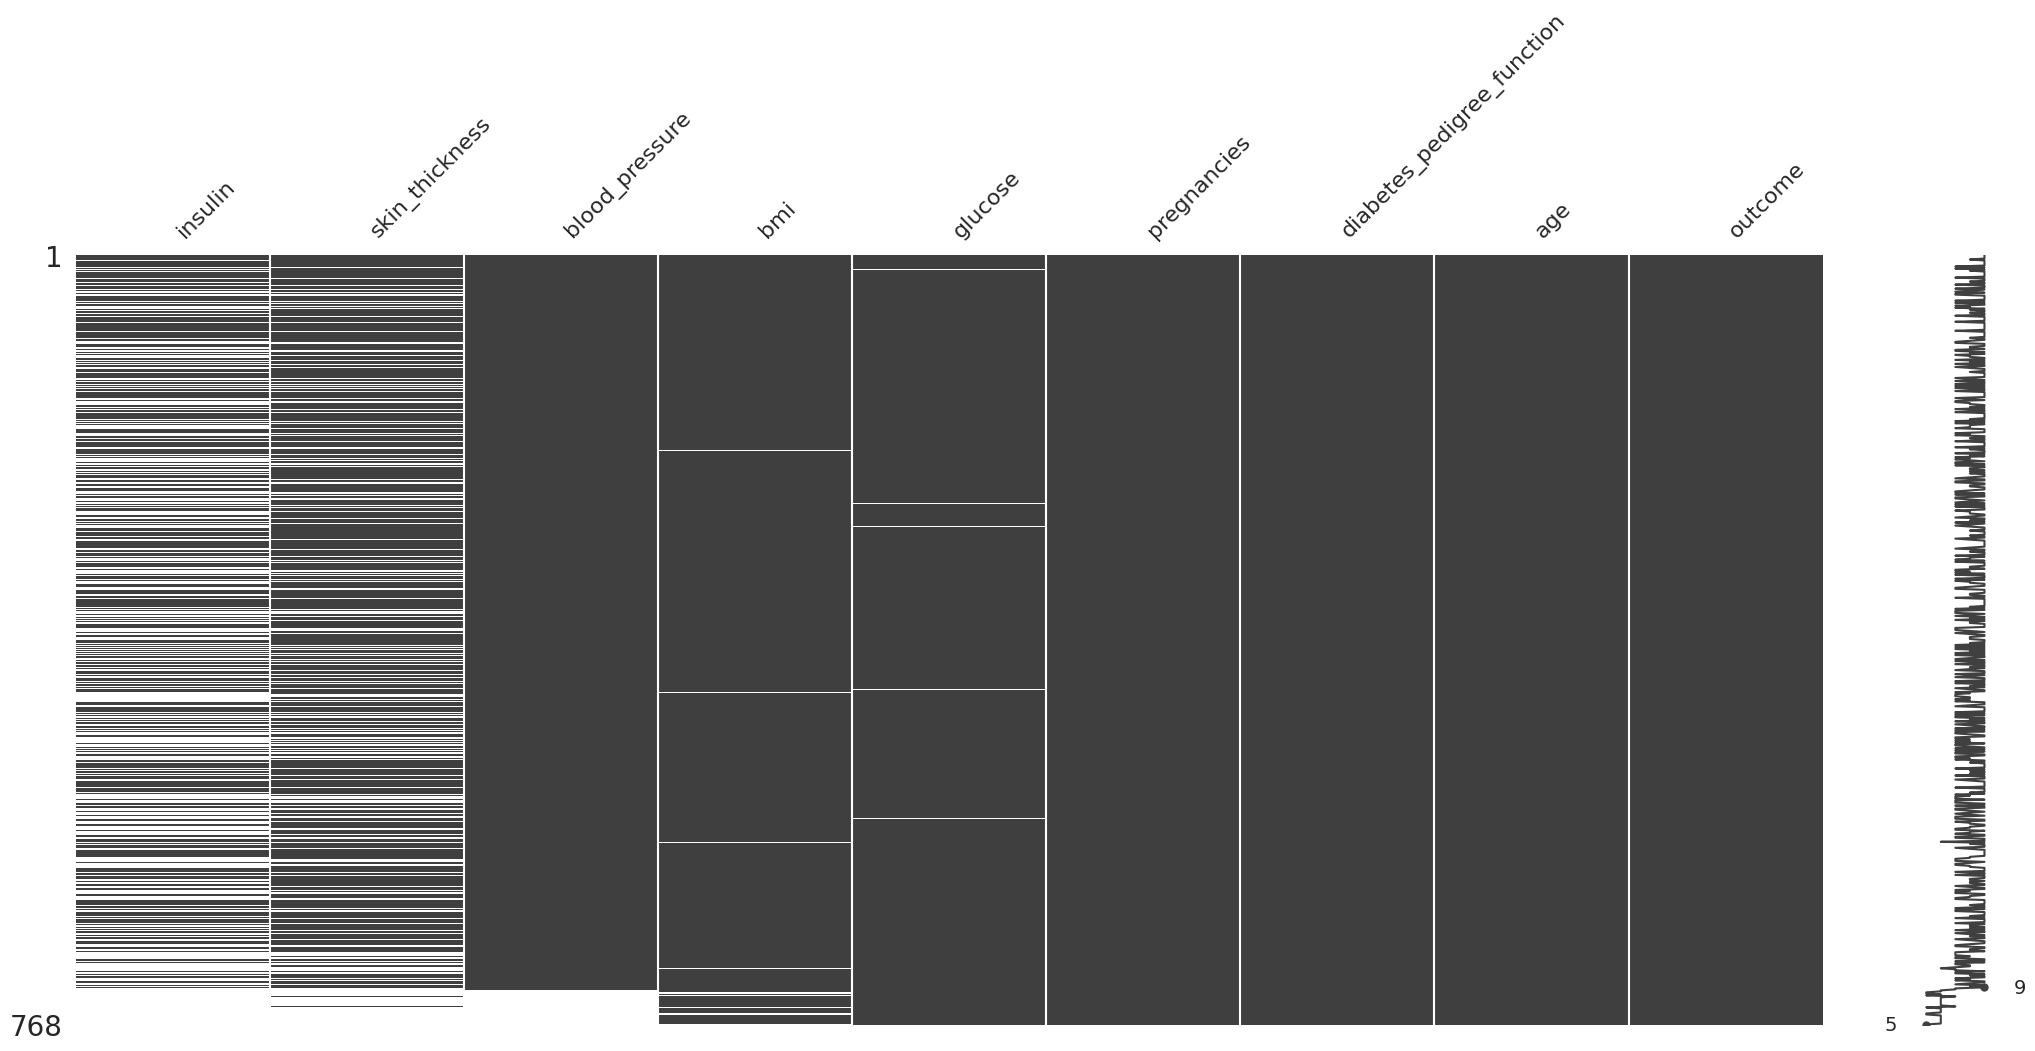

In [51]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="blood_pressure")
    .pipe(missingno.matrix)
)

### MNAR

<Axes: >

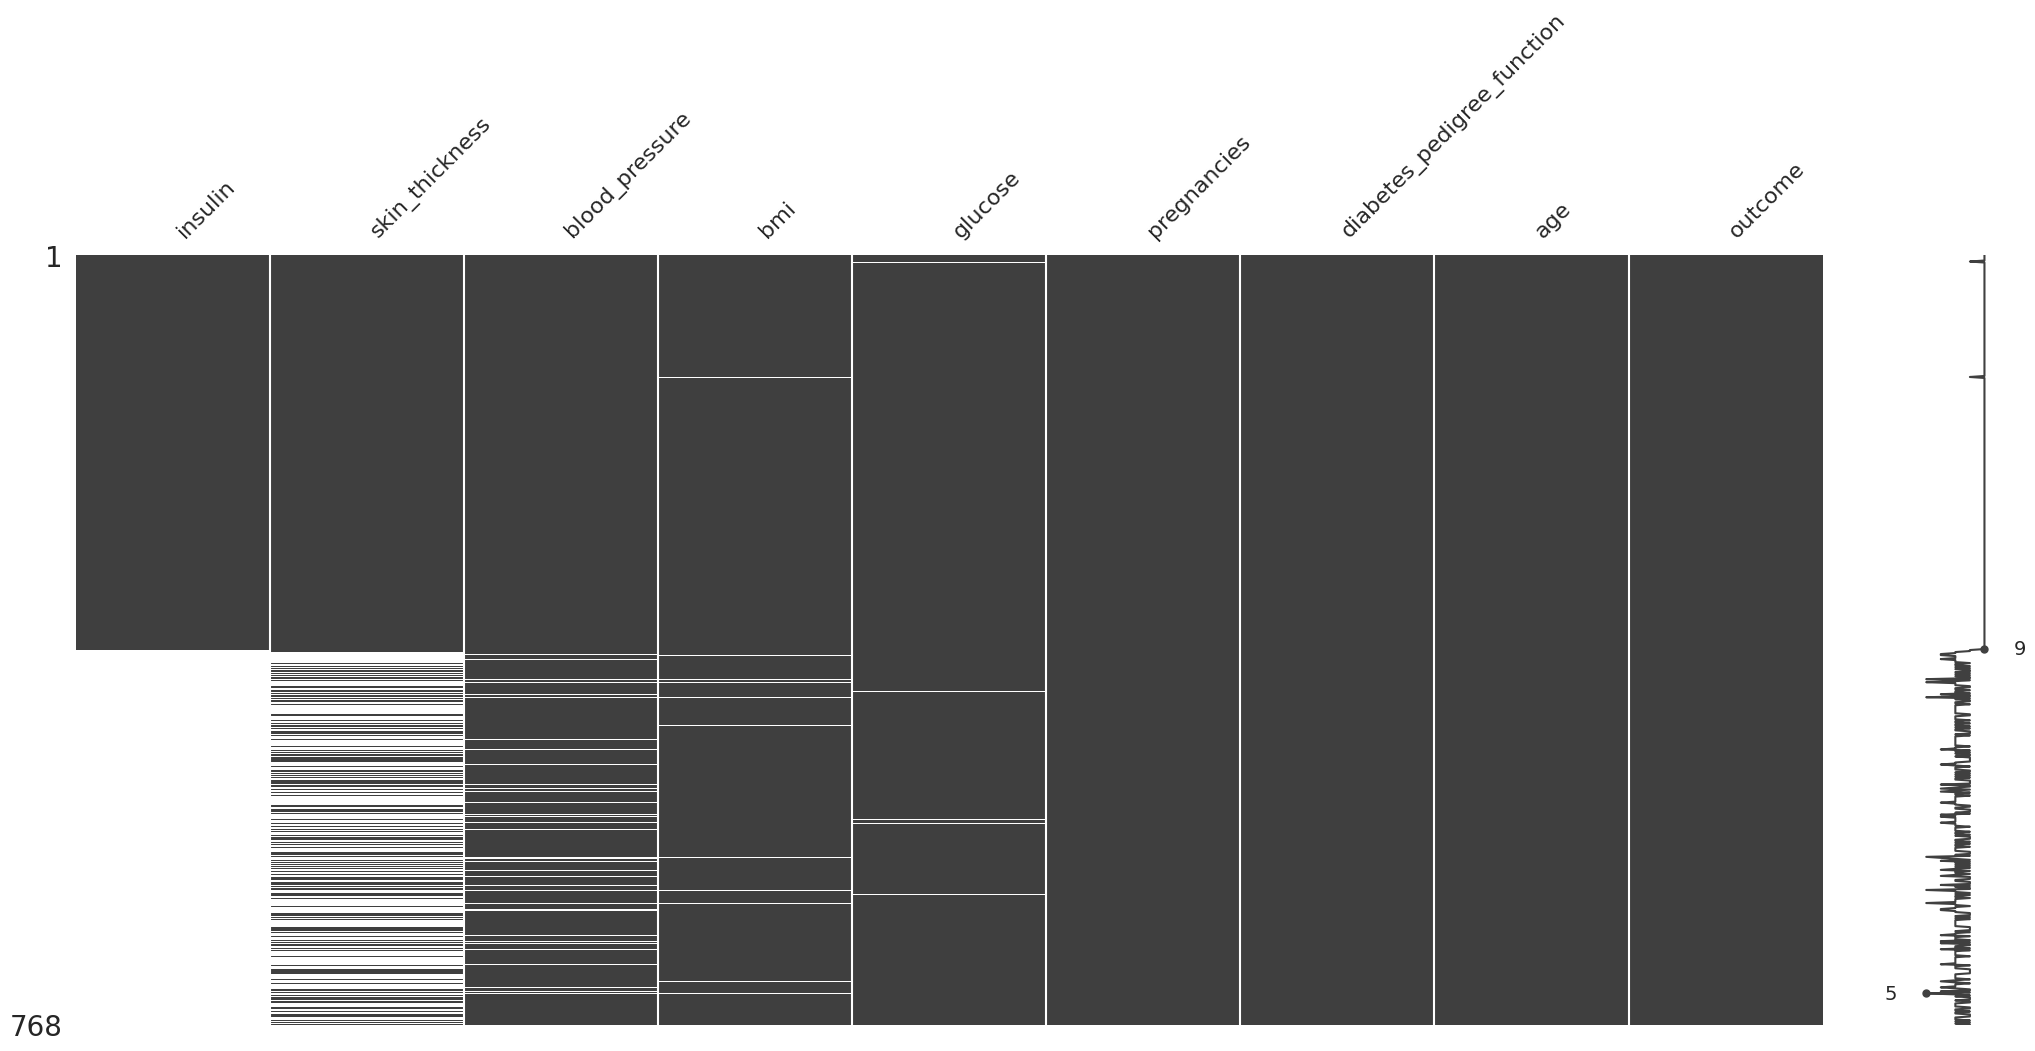

In [52]:
(
    diabetes_df
    .missing.sort_variables_by_missingness()
    .sort_values(by="insulin")
    .pipe(missingno.matrix)
)

## 8. Matriz de sombras

Con la matriz de sombras podemos identificar relaciones entre variables de datos faltantes.

Identifica todos tus valores faltantes.  
Reemplaza los valores faltantes con True (1) y el resto con False (0).  
Reemplaza los True y False por algo que te sea más informativo. Añade un sufijo a los nombres de tus variables.  


In [55]:
(
    riskfactors_df
    .isna()
    .replace({
        False: "Not missing",
        True:"Missing"
    })
    .add_suffix("_NA")
    .pipe(
        lambda shadow_matrix: pd.concat(
            [riskfactors_df, shadow_matrix],
            axis='columns'
        )
    )
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not missing,Missing,Missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not missing,Not missing,Not missing,Missing,Not missing,Not missing,Not missing,Not missing,Not missing,Not missing


In [57]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
)

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100_NA,smoke_days_NA,smoke_stop_NA,smoke_last_NA,diet_fruit_NA,diet_salad_NA,diet_potato_NA,diet_carrot_NA,diet_vegetable_NA,diet_juice_NA
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,Not Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10,Female,79,144,63,25.56,Widowed,NaN,0,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
241,46,Male,45,170,74,21.87,Divorced,NaN,2,4,...,Not Missing,Missing,Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
242,15,Male,62,175,71,24.46,Divorced,NaN,0,6,...,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing
243,34,Female,62,138,64,23.74,Married,NaN,0,4,...,Not Missing,Not Missing,Not Missing,Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing,Not Missing


In [59]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .groupby(["weight_lbs_NA"])
    ["age"]
    .describe()
    .reset_index()
)

,weight_lbs_NA,count,mean,std,min,25%,50%,75%,max
0,Missing,10.0,60.100000,13.706851,37.0,52.25,62.5,65.0,82.0
1,Not Missing,235.0,58.021277,17.662904,7.0,47.50,59.0,70.0,97.0


### Visualizacion

<Axes: xlabel='weight_lbs_NA', ylabel='age'>

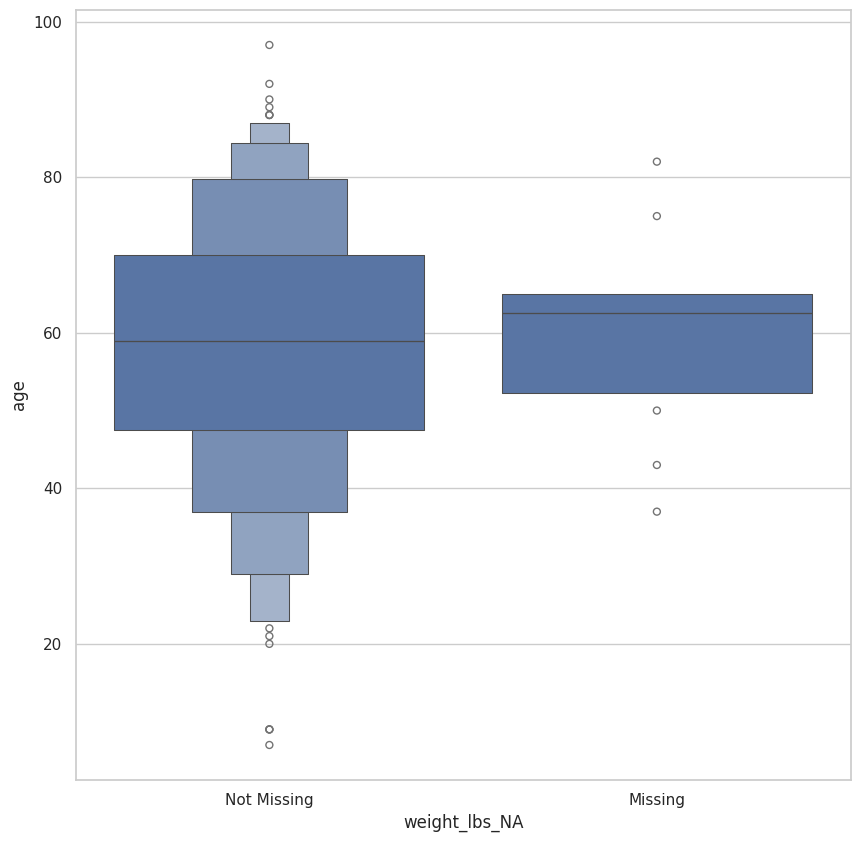

In [60]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:(
            sns.boxenplot(
                data=df,
                x = "weight_lbs_NA",
                y = "age"
            )
        )
    )
)

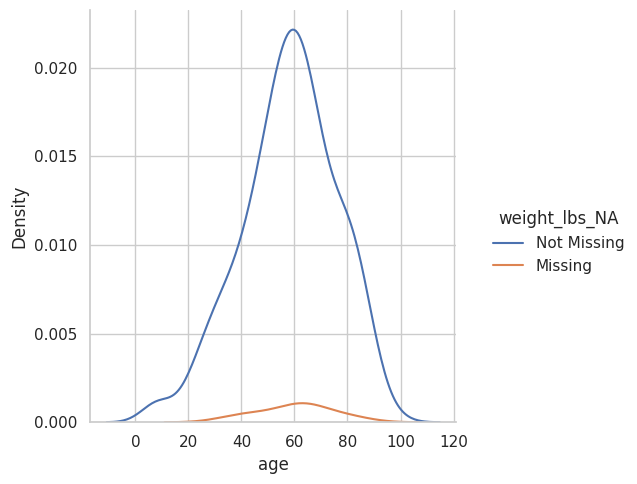

In [62]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x = "age",
                hue = "weight_lbs_NA",
                kind = "kde"
            )
        )
    )
)

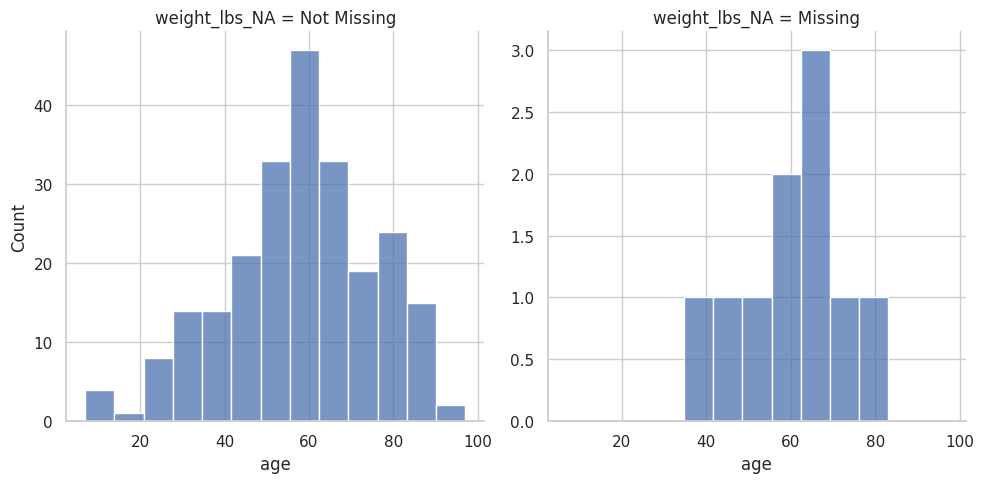

In [63]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x = "age",
                col = "weight_lbs_NA",
                facet_kws={
                    "sharey":False
                }
            )
        )
    )
)

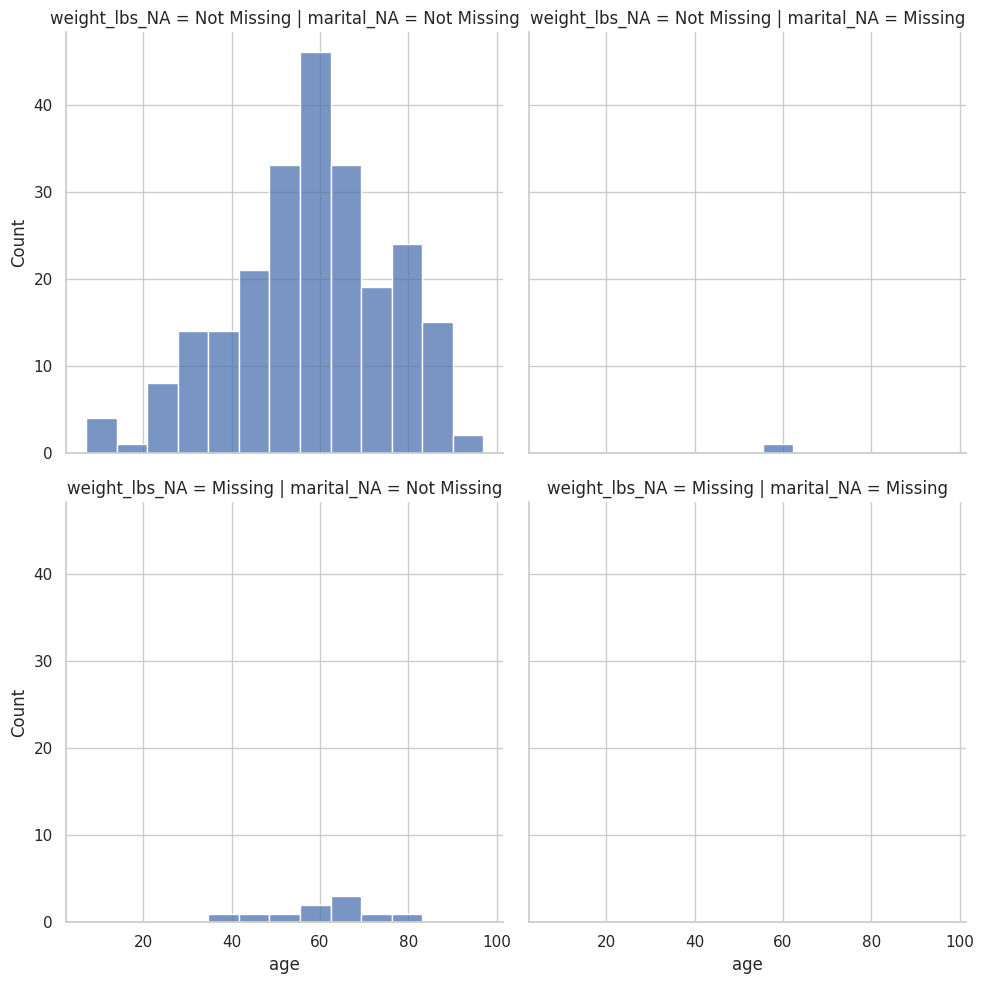

In [64]:
(
    riskfactors_df
    .missing
    .bind_shadow_matrix(only_missing = True)
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x = "age",
                col = "marital_NA",
                row = "weight_lbs_NA"
            )
        )
    )
)

In [65]:
def column_fill_with_dummies(
        column: pd.Series, 
        proportion_below: float = 0.10, 
        jitter: float = 0.075, 
        seed: int = 42
        ) -> pd.Series:
    
    column = column.copy(deep= True)

    # Extract values metadata
    missing_mask = column.isna()
    number_missing_values = missing_mask.sum()
    column_range = column.max() - column.min()

    #Shift data
    column_shift = column.min() - column.min()*proportion_below

    # Create the jitter to be added around the points

    np.random.seed(seed)
    column_jitter = (np.random.rand(number_missing_values) - 2) * column_range * jitter

    # Save new dummy data
    column[missing_mask] = column_shift + column_jitter

    return column

<Axes: xlabel='weight_lbs', ylabel='height_inch'>

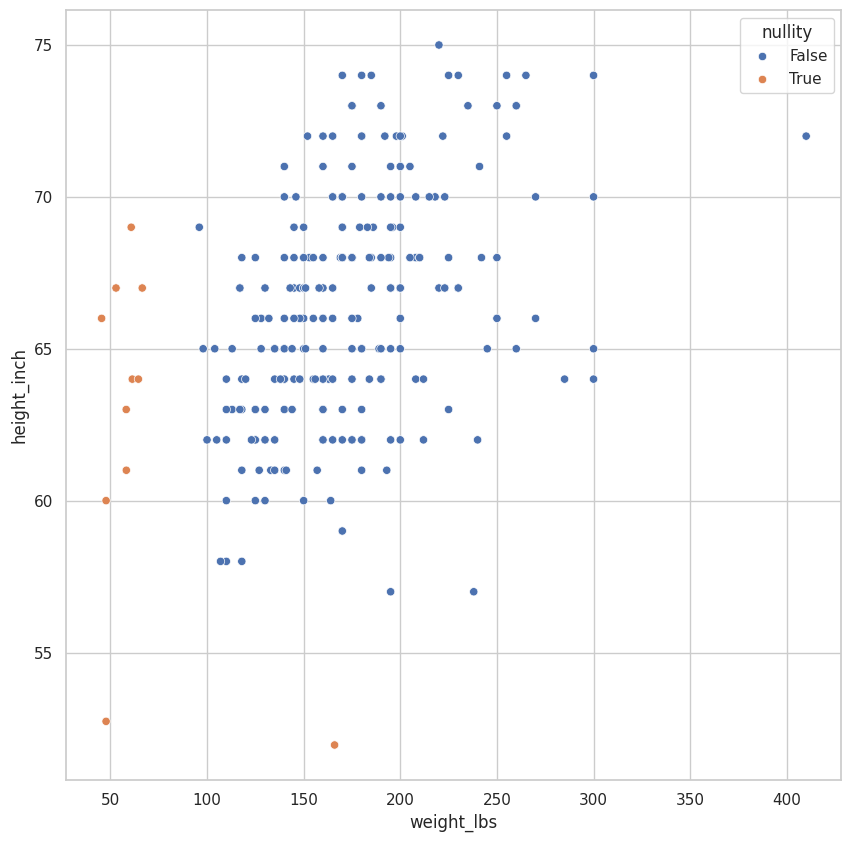

In [71]:
(
    riskfactors_df
    .select_dtypes(
        exclude = "category"
    )
    .pipe(
        lambda df: df[df.columns[df.isna().any()]]
    )
    .missing.bind_shadow_matrix(true_string = True, false_string = False)
    .apply(
        lambda column: column if "_NA" in column.name else column_fill_with_dummies(column, proportion_below=0.05, jitter=0.075)
    )
    .assign(
        nullity = lambda df: df.weight_lbs_NA | df.height_inch_NA
    )
    .pipe(
        lambda df: (
            sns.scatterplot(
                data=df,
                x = "weight_lbs",
                y = "height_inch",
                hue = "nullity"
            )
        )
    )
)

## Correlacion de nulidad

<Axes: >

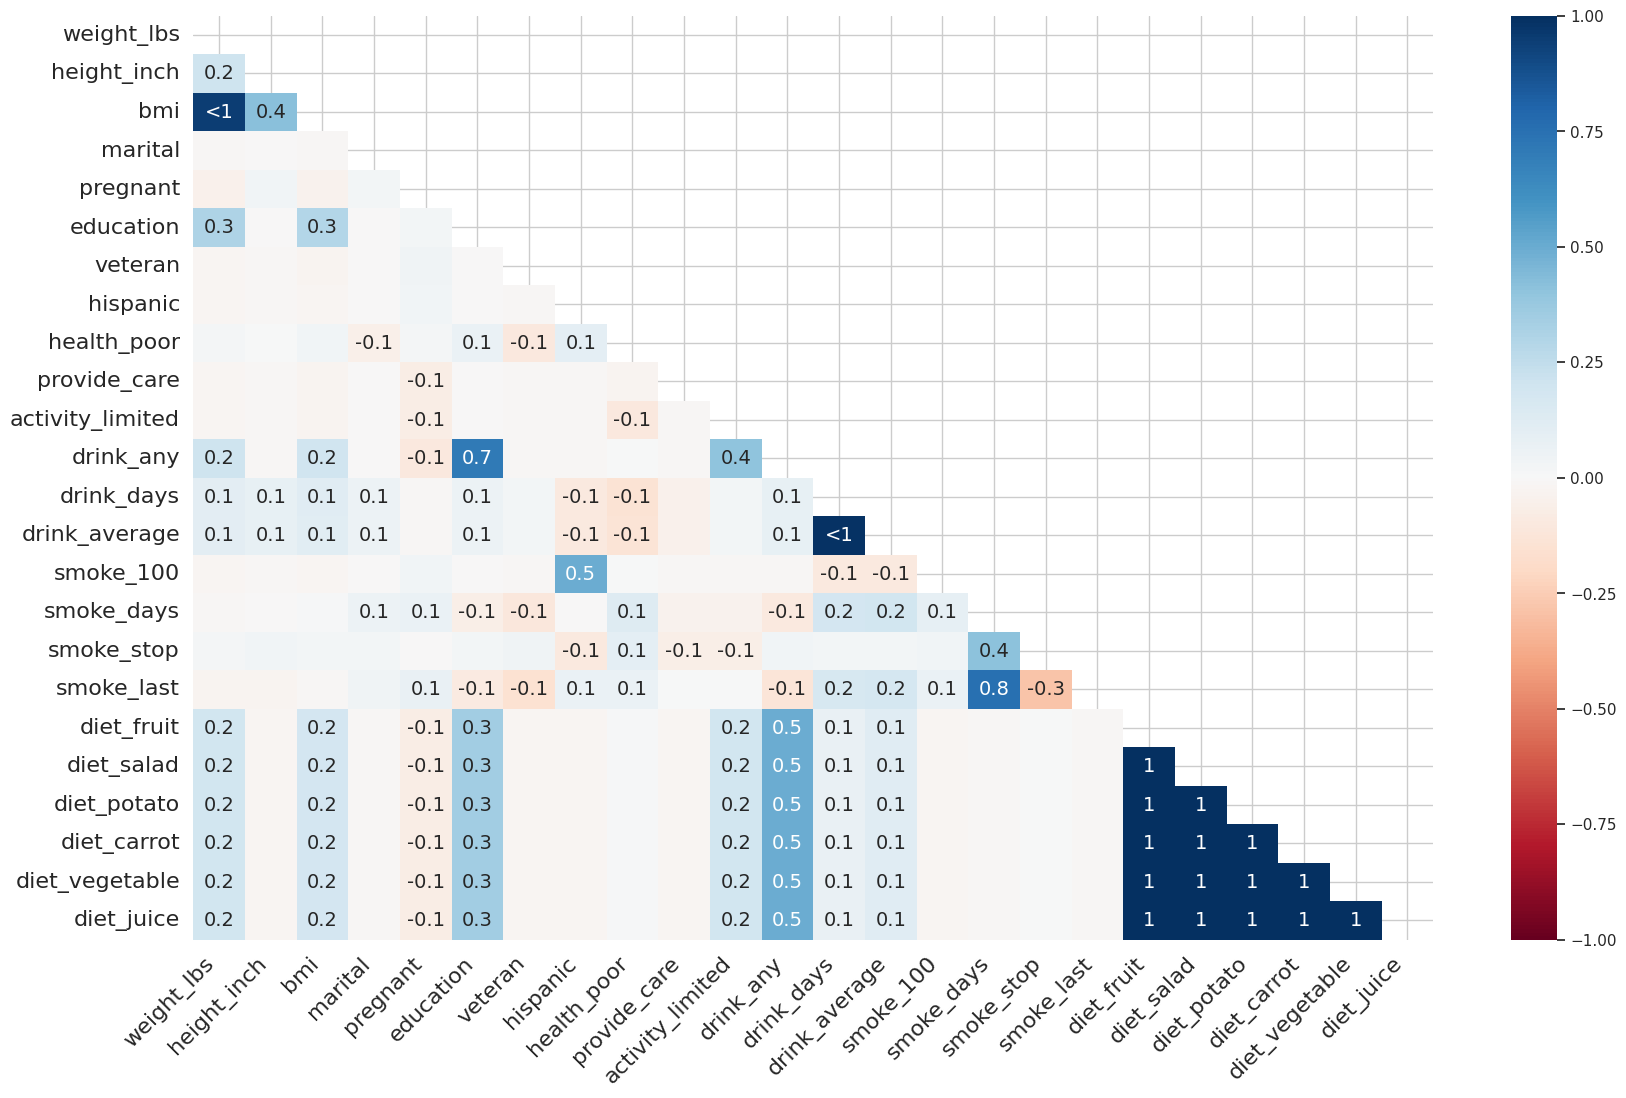

In [72]:
missingno.heatmap(
    df = riskfactors_df
)

<Axes: >

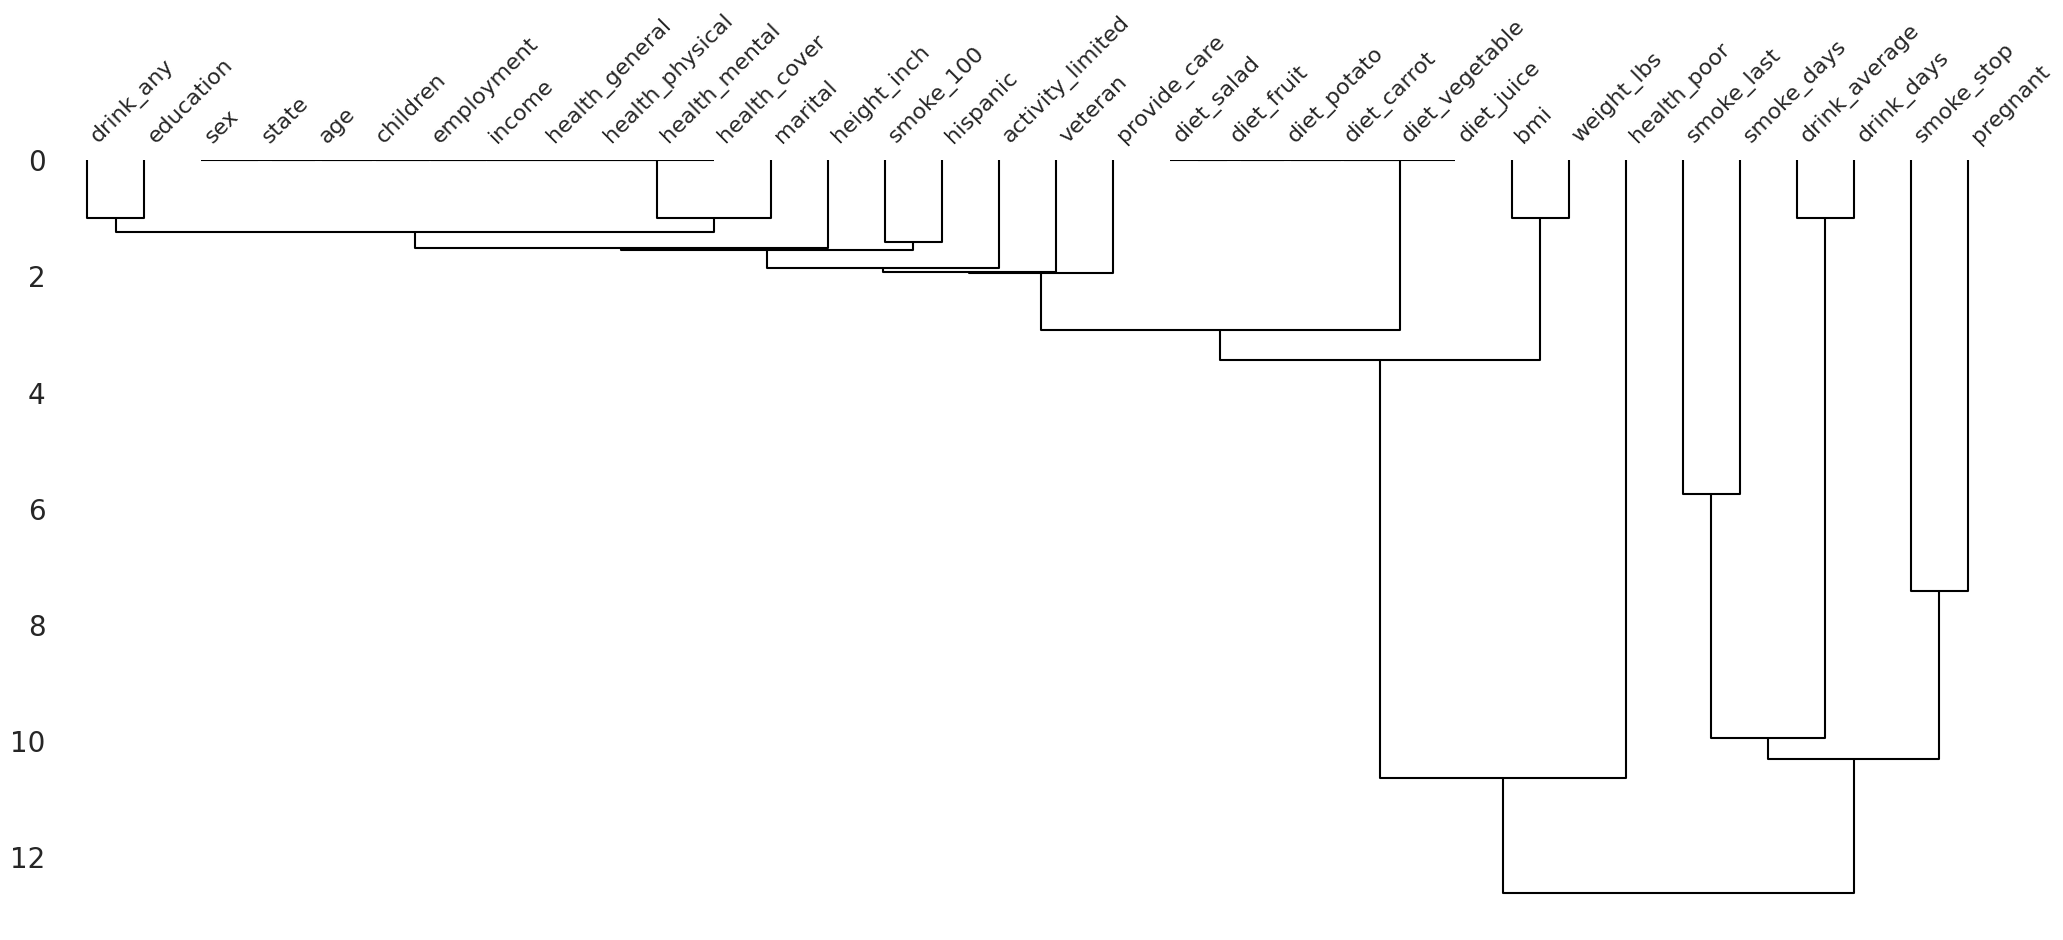

In [73]:
missingno.dendrogram(
    df = riskfactors_df
)

## Eliminacion de valores faltantes

Se asume cuando se eliminan que son MCAR

In [74]:
riskfactors_df.shape

(245, 34)